<a href="https://colab.research.google.com/github/swopnimghimire-123123/Machine-Learning-Journey/blob/main/35_Complete_Case_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/35_data_science_job.csv")

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [4]:
df.shape

(19158, 13)

In [9]:
# Returns what percentage of the values are null
df.isnull().mean()*100

,0
enrollee_id,0.000000
city,0.000000
city_development_index,2.500261
gender,23.530640
relevent_experience,0.000000
enrolled_university,2.014824
education_level,2.401086
major_discipline,14.683161
experience,0.339284
company_size,30.994885


In [10]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [12]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
5675,0.923,Part time course,High School,1.0,190.0
3863,0.887,no_enrollment,Graduate,20.0,3.0
6209,0.920,no_enrollment,Graduate,20.0,145.0
12693,0.847,NaN,NaN,2.0,162.0
17996,0.848,no_enrollment,Graduate,5.0,56.0


In [13]:
df["education_level"].value_counts()

,count
education_level,
Graduate,11598
Masters,4361
High School,2017
Phd,414
Primary School,308


In [14]:
len(df[cols].dropna()) / len(df)

0.8968577095730244

In [15]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

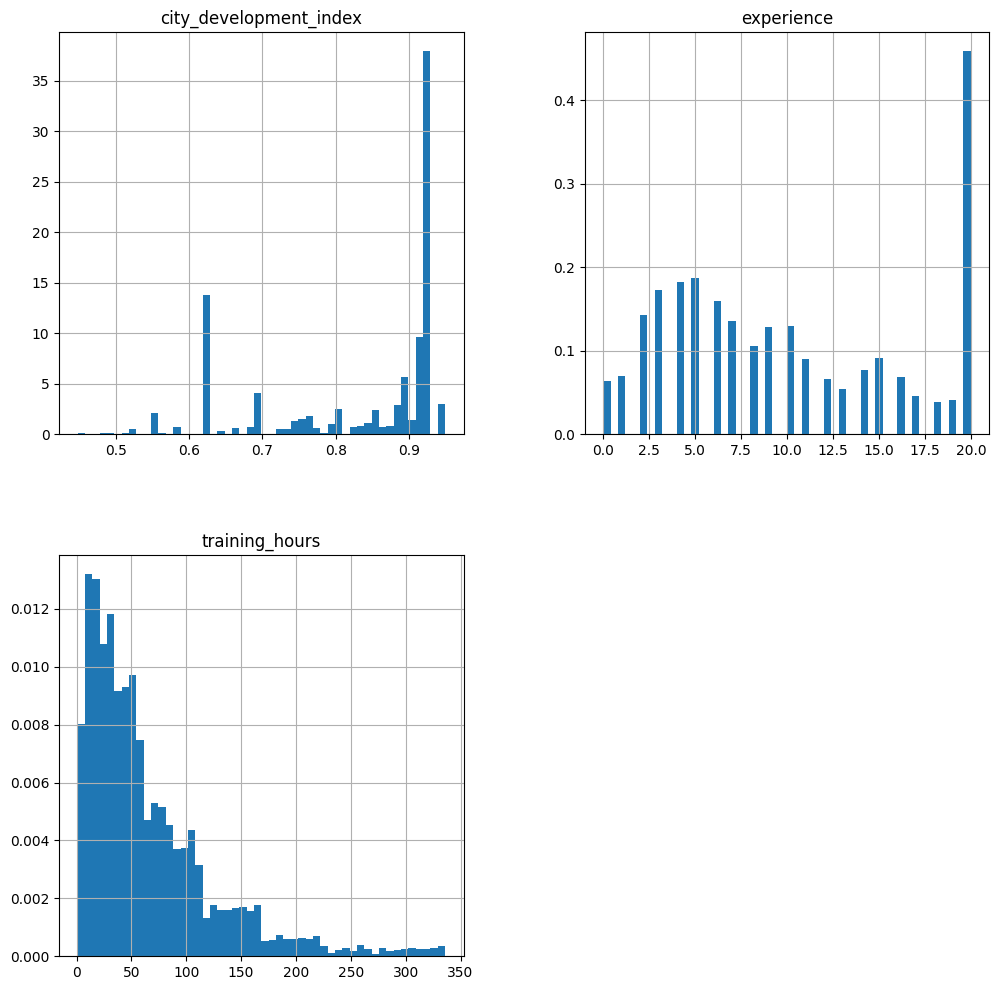

In [17]:
new_df.hist(bins=50, density=True, figsize=(12,12))
plt.show()

<Axes: >

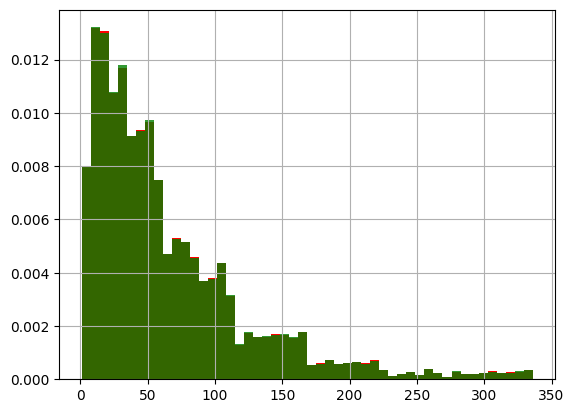

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data
df["training_hours"].hist(bins=50, ax=ax, density=True, color="red")

# Data after cca, the argument aplha makes the color transparent, so that
# we can see the overlay of 2 distributions
new_df["training_hours"].hist(bins=50, ax=ax, density=True, color="green",alpha=0.8)

<Axes: ylabel='Density'>

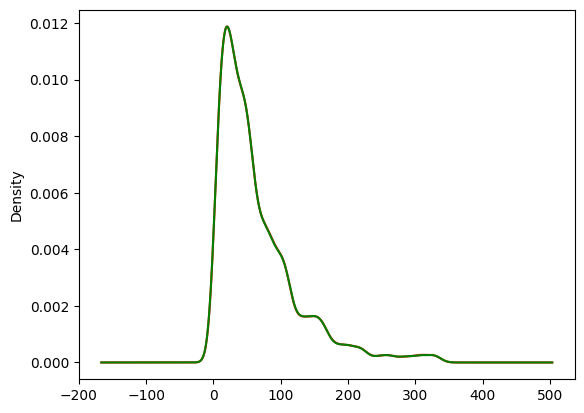

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df["training_hours"].plot.density(color="red")

# data after cca
new_df["training_hours"].plot.density(color="green")

<Axes: >

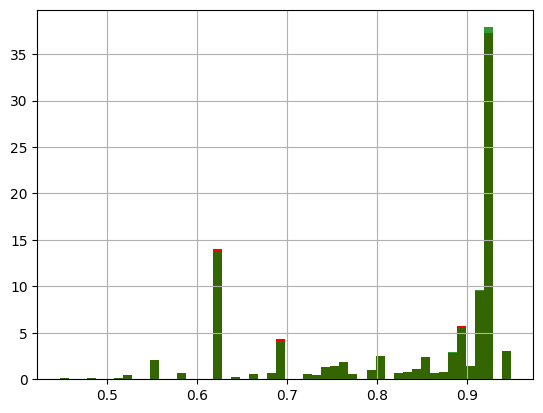

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df["city_development_index"].hist(bins=50, ax=ax, density=True, label="original",color="red")

# data after cca, the argument alpha makes the color tranasparent so that we
# can see the overlay between two distributions
new_df["city_development_index"].hist(bins=50, ax=ax, density=True, label="original",color="green",alpha=0.8)

<Axes: ylabel='Density'>

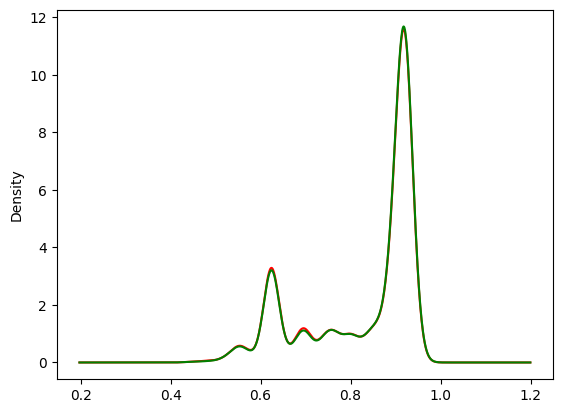

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data
df["city_development_index"].plot.density(color="red")

# data after cca
new_df["city_development_index"].plot.density(color="green")

<Axes: >

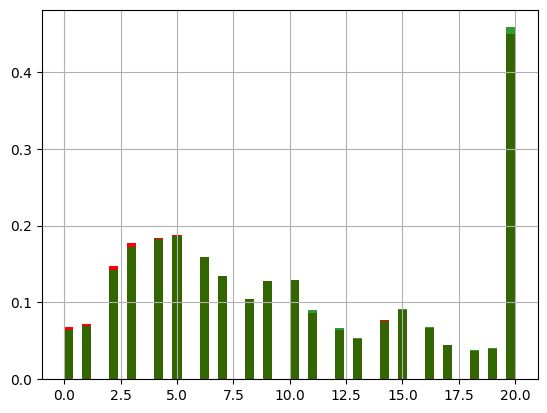

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df["experience"].hist(bins=50, ax=ax, density=True, color="red")

# data after cca, the argument alpha makes the color transparent, so we can
# see the ovelay between two distributions
new_df["experience"].hist(bins=50, ax=ax, density=True, color="green", alpha=0.8)

<Axes: ylabel='Density'>

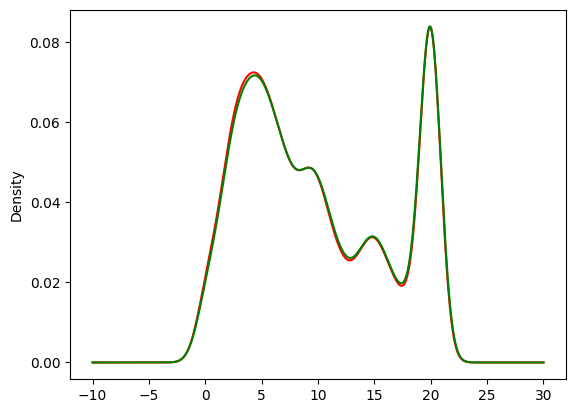

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data
df["experience"].plot.density(color="red")

# data after cca
new_df["experience"].plot.density(color="green")

In [40]:
temp = pd.concat([
    # percentage of observations per catagory, original data
    df["enrolled_university"].value_counts() / len(df),

    # percentage of observations per catagory, cca data
    new_df["enrolled_university"].value_counts() / len(new_df)
],
axis=1)
# add column names
temp.columns = ["original","cca"]

temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [41]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['education_level'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['education_level'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
